# COMPLETE CASE ANALYSIS(CCA), also called 'list wise deletion' of cases, consists in discarding observations where value of any variable is missing.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,NaN,24.0,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5.0,50-99,Funded Startup,24.0,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,18.0,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,46.0,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17.0,10000+,Pvt Ltd,123.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [6]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [7]:
df.shape

(19158, 13)

In [9]:
cols = [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
769,0.920,no_enrollment,Graduate,17.0,39.0
11518,0.698,Full time course,Graduate,7.0,8.0
14039,0.740,no_enrollment,Graduate,15.0,77.0
3595,0.920,no_enrollment,Graduate,1.0,24.0
1327,0.698,Full time course,Graduate,3.0,55.0


In [11]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [14]:
new_df = df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

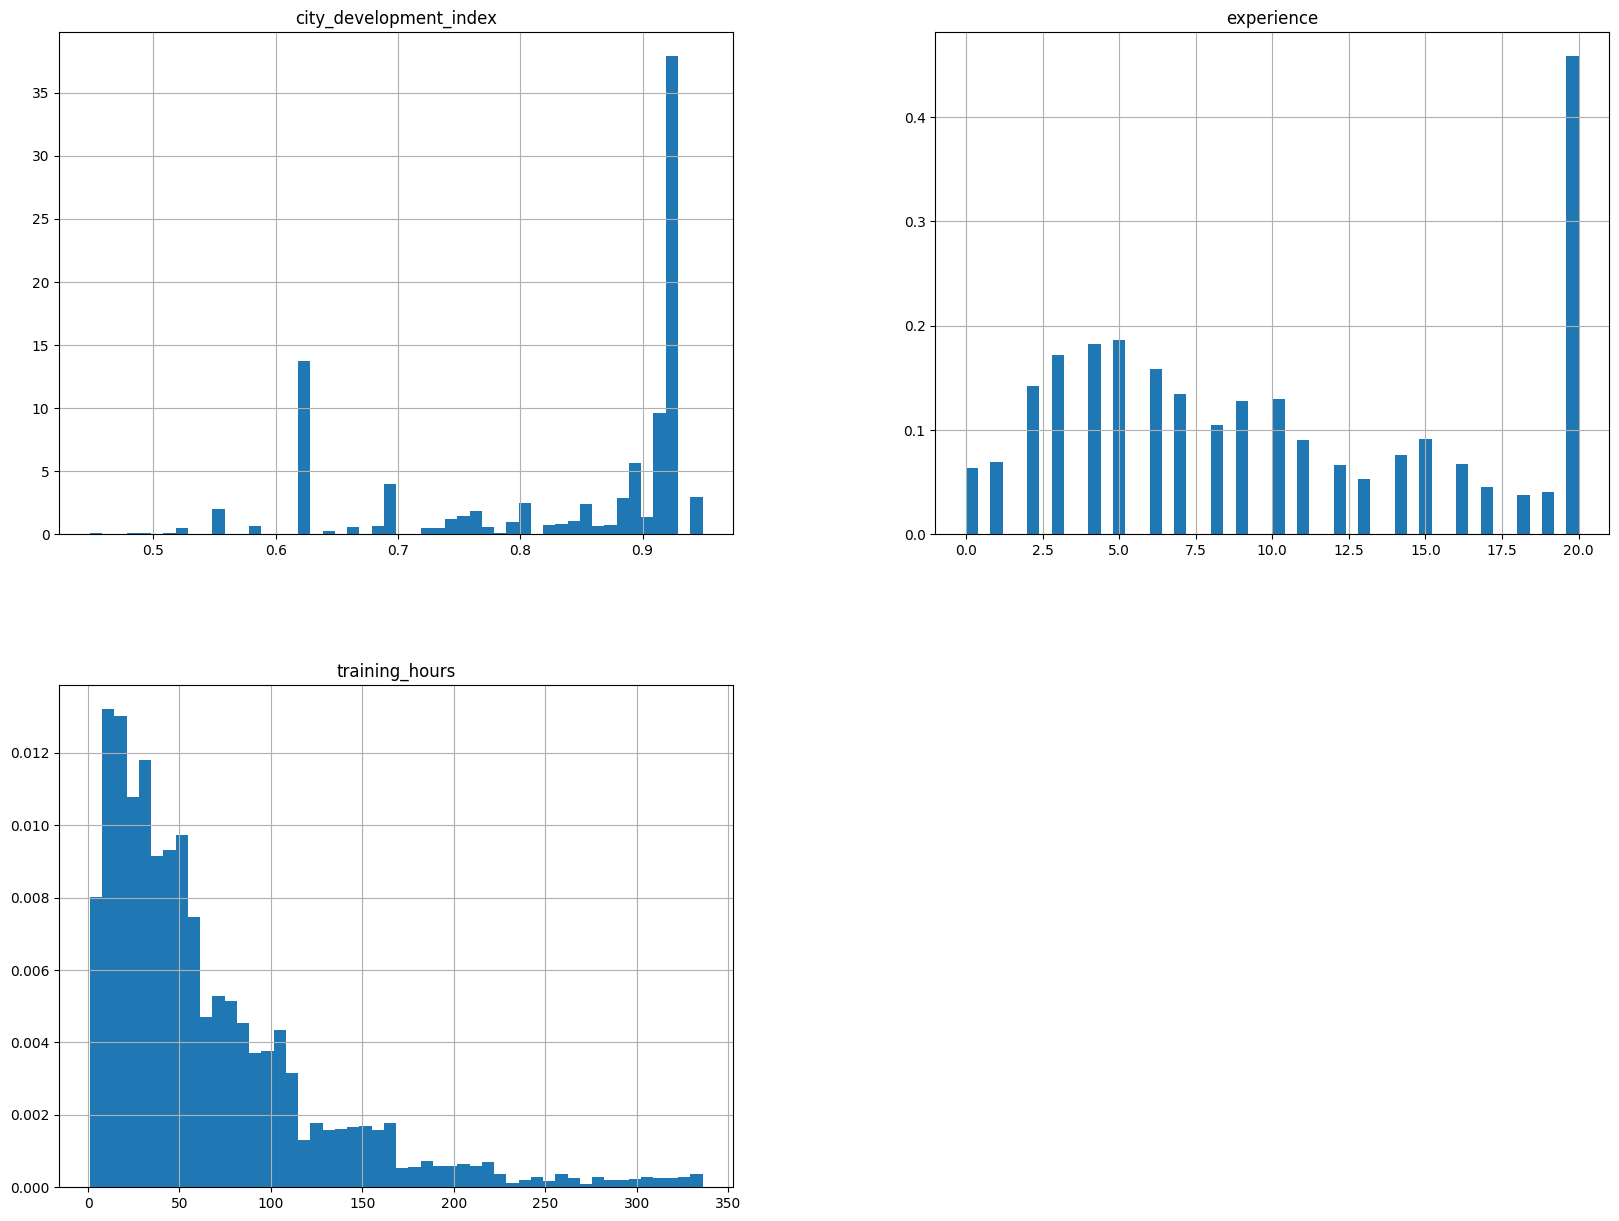

In [15]:
new_df.hist(bins=50, density= True ,figsize=(20,15))

<Axes: >

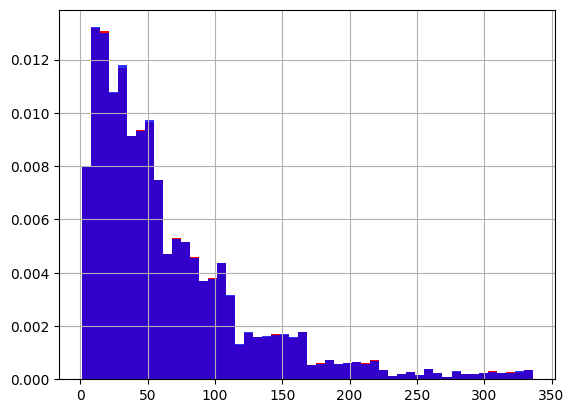

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
#original data
df['training_hours'].hist(bins=50, density= True ,ax=ax, color='red')

# data after cca, the argumnent alpha makes the olor transparent so that we can see the overlap of 2 distributions 

new_df['training_hours'].hist(bins=50, density= True ,ax=ax, color='blue', alpha=0.8)


<Axes: ylabel='Density'>

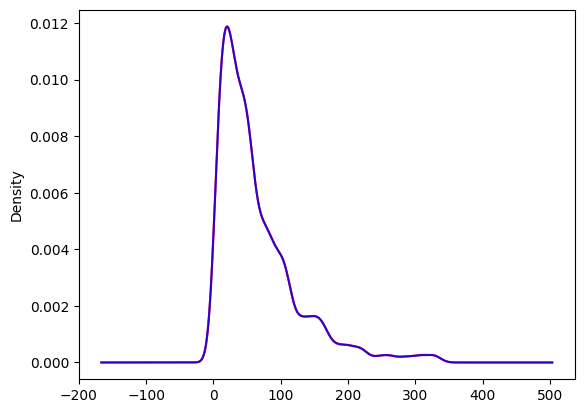

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
#original data
df['training_hours'].plot.density(ax=ax, color='red')

# data after cca
new_df['training_hours'].plot.density(ax=ax, color='blue', alpha=0.8)

<Axes: >

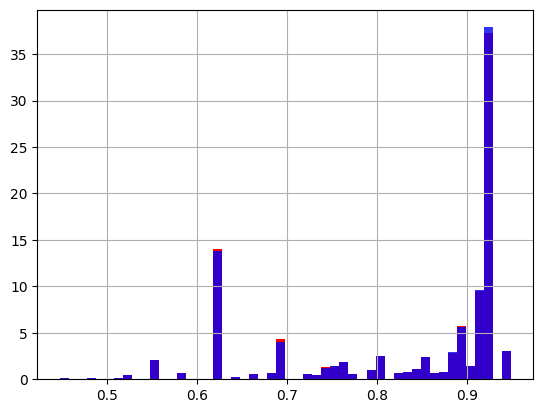

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
#original data
df['city_development_index'].hist(bins=50, density= True ,ax=ax, color='red')

# data after cca, the argumnent alpha makes the olor transparent so that we can see the overlap of 2 distributions 

new_df['city_development_index'].hist(bins=50, density= True ,ax=ax, color='blue', alpha=0.8)

<Axes: ylabel='Density'>

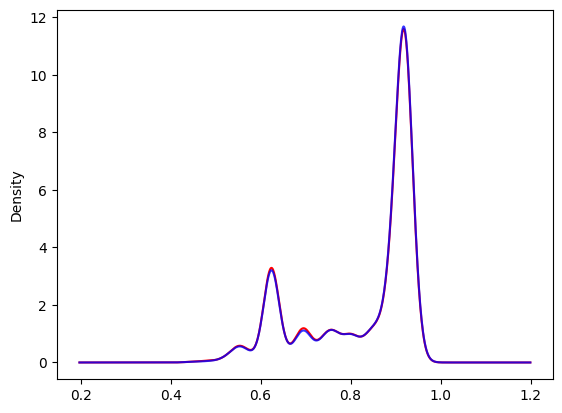

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
#original data
df['city_development_index'].plot.density(ax=ax, color='red')

# data after cca
new_df['city_development_index'].plot.density(ax=ax, color='blue', alpha=0.8)

<Axes: >

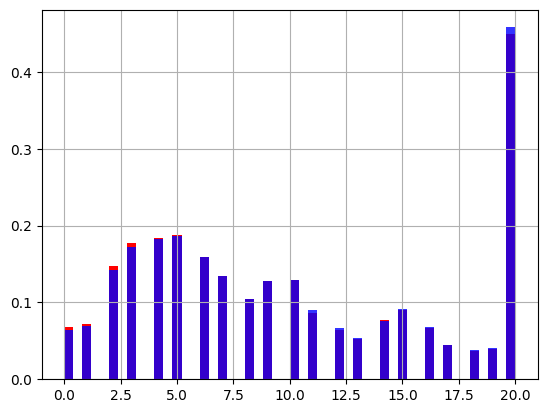

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
#original data
df['experience'].hist(bins=50, density= True ,ax=ax, color='red')

# data after cca, the argumnent alpha makes the olor transparent so that we can see the overlap of 2 distributions 

new_df['experience'].hist(bins=50, density= True ,ax=ax, color='blue', alpha=0.8)

<Axes: ylabel='Density'>

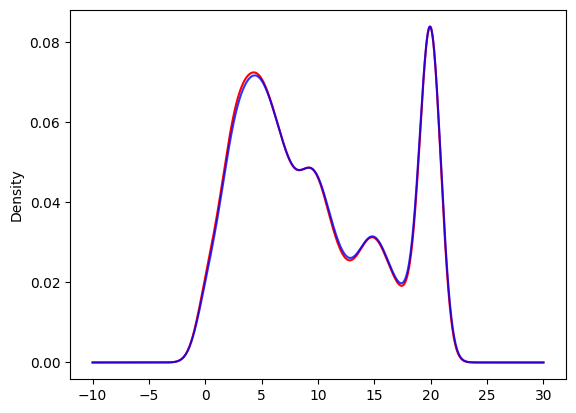

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
#original data
df['experience'].plot.density(ax=ax, color='red')

# data after cca
new_df['experience'].plot.density(ax=ax, color='blue', alpha=0.8)